### Get Data

In [0]:
!wget -q -O dog.jpeg https://images.pexels.com/photos/356378/pexels-photo-356378.jpeg?auto=compress&cs=tinysrgb&dpr=1&w=500

In [12]:
!ls -l

total 458708
drwxr-xr-x 3 root root      4096 Aug  2 07:23 data
-rw-r--r-- 1 root root   1304704 Jul 22 10:57 dog.jpeg
-rw-r--r-- 1 root root 228813984 Feb 10  2016 flower_photos.tgz
-rw-r--r-- 1 root root 228813984 Feb 10  2016 flower_photos.tgz.1
-rw-r--r-- 1 root root   5510064 Aug  2 09:22 mnist_generator_cgan.h5
-rw-r--r-- 1 root root   5253280 Aug  2 09:06 mnist_generator_dcgan.h5
drwxr-xr-x 1 root root      4096 Jul 30 16:17 sample_data


In [0]:
import tensorflow as tf
import numpy as np

In [0]:
img = tf.keras.preprocessing.image.load_img('dog.jpeg')
img = img.resize((600,400))

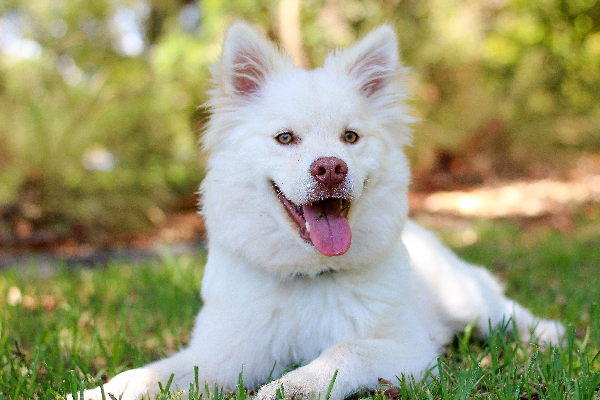

In [15]:
img

### Predicting using VGG

In [0]:
#Load VGG Model
vgg = tf.keras.applications.vgg16.VGG16(include_top=True, #Should we include classification Layers
                                        weights='imagenet', #Load imagenet weights, 'None' will load random weights
                                        input_shape=(224,224,3)) #Input image size

In [0]:
#Prepare Input
model_input = img.resize((224,224))
model_input = tf.keras.preprocessing.image.img_to_array(model_input)
model_input = tf.keras.applications.vgg16.preprocess_input(model_input)
model_input = np.expand_dims(model_input, axis=0)

In [0]:
#Predict
prediction = vgg.predict(model_input)

In [19]:
prediction.shape

(1, 1000)

In [20]:
#Prediction Class
np.argmax(prediction[0])

248

ImageNet Class IDs
- https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a

#### Measuring Prediction time

In [0]:
import time

In [22]:
t0 = time.time()
prediction = vgg.predict(model_input)
print('Prediction time:', time.time()-t0, 'secs')

Prediction time: 0.02290177345275879 secs
